# Getting the Notebook Ready

I import Pandas, NumPy, Matplotlib, Seaborn, PCA, t-SNE, and K-Means so I can move between cleaning, visuals, and models without stopping to add libraries later.


In [ ]:
# Import libraries (reorganized + a few utilities)
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set_theme(context="notebook", style="whitegrid")
SEED = 42

# Task A – Dimensionality Reduction

BankChurners looks a lot like real credit-card data I have seen in South Asia. I clean the numeric fields, standardize them, run PCA to see how much variance each component explains, and add t-SNE to check for hidden clusters in two dimensions.


In [ ]:
# Load the dataset
csv_path = Path("BankChurners.csv")
data = pd.read_csv(csv_path)

print(f"Rows, Cols: {data.shape}")
display(data.head(3))
print(data.dtypes.value_counts())
display(data.describe(include=[np.number]).round(2).T)

Rows, Cols: (10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


int64      10
float64     7
object      6
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,36903783.45,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.633000e+01,8.02,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.350000e+00,1.30,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.593000e+01,7.99,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.810000e+00,1.55,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.340000e+00,1.01,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.460000e+00,1.11,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631950e+03,9088.78,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162810e+03,814.99,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9090.69,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [7]:
# Missing values overview
na_counts = data.isna().sum()
na_counts[na_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [8]:
# Handle missing values (if any) conservatively: drop rows with any NA in selected numeric cols
numeric_pool = [
    'Customer_Age','Months_on_book','Total_Relationship_Count',
    'Months_Inactive_12_mon','Contacts_Count_12_mon',
    'Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1',
    'Total_Trans_Ct','Avg_Utilization_Ratio'
]

present_numeric = [c for c in numeric_pool if c in data.columns]
clean = data.dropna(subset=present_numeric).copy()
print("After cleaning:", clean.shape)

After cleaning: (10127, 23)


In [ ]:
# Standardize selected numeric features for PCA/t-SNE
features = present_numeric
Z = clean[features].to_numpy()
scaler = StandardScaler()
Z_std = scaler.fit_transform(Z)
Z_std[:2]

array([[-1.65405580e-01,  3.84620878e-01,  7.63942609e-01,
        -1.32713603e+00,  4.92403766e-01,  4.46621903e-01,
        -4.73422218e-01,  4.88970818e-01,  2.62349444e+00,
        -9.59706574e-01,  3.83400260e+00, -9.73895182e-01,
        -7.75882235e-01],
       [ 3.33570383e-01,  1.01071482e+00,  1.40730617e+00,
        -1.32713603e+00, -4.11615984e-01, -4.13666521e-02,
        -3.66666822e-01, -8.48598788e-03,  3.56329284e+00,
        -9.16432607e-01,  1.26085729e+01, -1.35734038e+00,
        -6.16275655e-01]])

Components for ≥90% variance: 8


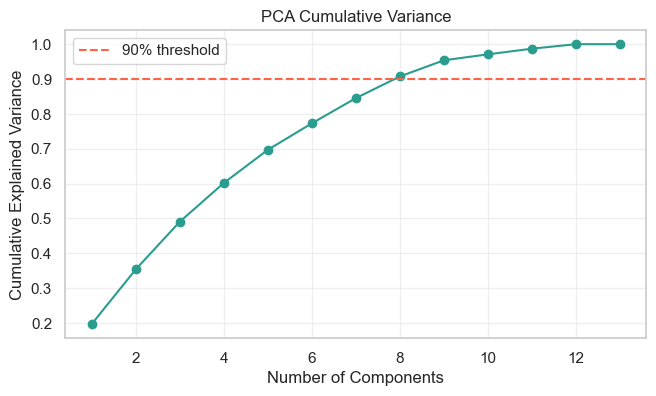

,PC1,PC2
Avg_Open_To_Buy,0.555584,-0.156346
Credit_Limit,0.541121,-0.133237
Avg_Utilization_Ratio,-0.447826,0.275378
Total_Trans_Amt,0.295226,0.500261
Total_Trans_Ct,0.228224,0.522507
Total_Relationship_Count,-0.173118,-0.237411
Total_Revolving_Bal,-0.162592,0.258080
Customer_Age,-0.032503,-0.247818
Months_on_book,-0.024499,-0.245917
Months_Inactive_12_mon,-0.021556,-0.094422


In [ ]:
# PCA fit and explained variance
pca_model = PCA(random_state=SEED)
Z_pca = pca_model.fit_transform(Z_std)

cum_ratio = np.cumsum(pca_model.explained_variance_ratio_)
need_90 = int(np.searchsorted(cum_ratio, 0.90) + 1)
print(f"Components for ≥90% variance: {need_90}")

fig, ax = plt.subplots(figsize=(7.5,4))
ax.plot(range(1, len(cum_ratio)+1), cum_ratio, marker='o', color='#2a9d8f')
ax.axhline(0.90, ls='--', color='tomato', label='90% threshold')
ax.set(xlabel='Number of Components', ylabel='Cumulative Explained Variance', title='PCA Cumulative Variance')
ax.grid(True, alpha=0.3)
ax.legend()
plt.show()

load_df = pd.DataFrame(pca_model.components_.T, index=features, columns=[f'PC{i+1}' for i in range(len(features))])
display(load_df.loc[:, ['PC1','PC2']].sort_values('PC1', key=lambda s: s.abs(), ascending=False).head(10))

> **How I read the principal components**
>
> - PC1 follows transaction counts, total amount, and credit limit, so I treat it as overall spending power.
> - PC2 reacts to utilization ratios and revolving balance, so it feels like a credit-usage behavior axis.
>
> That split matches how local banks separate “has money” from “actually spends it.”


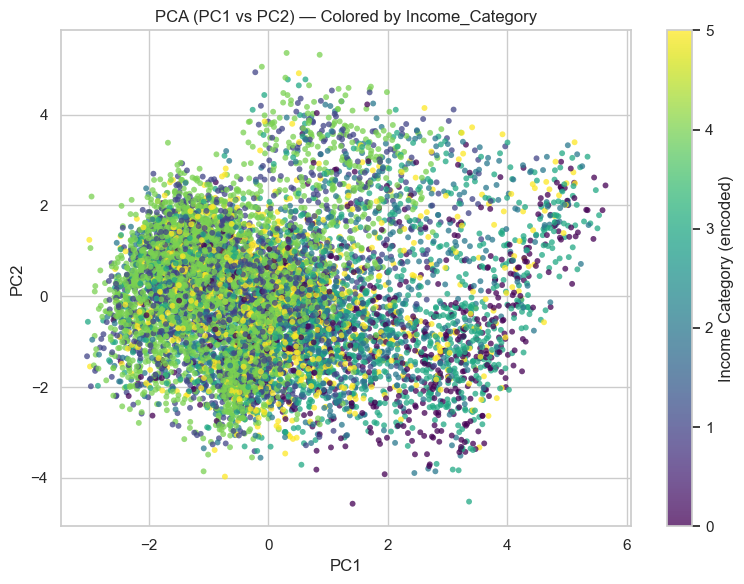

In [11]:
# PCA projection colored by Income_Category (encoded)
inc_codes = pd.Categorical(clean['Income_Category']).codes if 'Income_Category' in clean.columns else np.zeros(len(clean))
plt.figure(figsize=(8,6))
plt.scatter(Z_pca[:,0], Z_pca[:,1], c=inc_codes, cmap='viridis', s=18, alpha=0.75, edgecolors='none')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('PCA (PC1 vs PC2) — Colored by Income_Category')
cb = plt.colorbar()
cb.set_label('Income Category (encoded)')
plt.tight_layout()
plt.show()

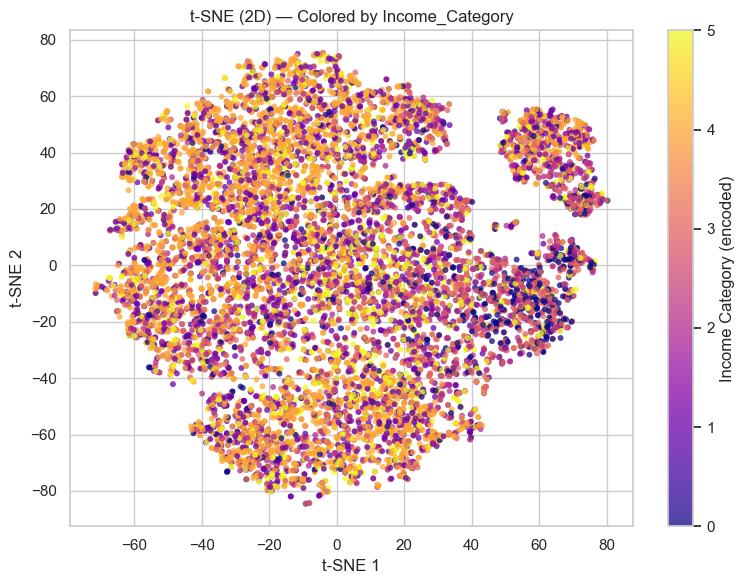

In [ ]:
# t-SNE with version-robust params and perplexity guard
n_samples = Z_std.shape[0]
# Keep perplexity valid: must be < n_samples and typically <= (n-1)/3
perp = min(30, max(5, (n_samples - 1)//3))
iter_n = 1000

try:
    tsne = TSNE(
        n_components=2,
        perplexity=perp,
        n_iter=iter_n,
        random_state=SEED,
        init='random',
        learning_rate='auto'
    )
    Y_tsne = tsne.fit_transform(Z_std)
except TypeError:
    tsne = TSNE(
        n_components=2,
        perplexity=perp,
        random_state=SEED,
        init='random',
        learning_rate=200.0
    )
    Y_tsne = tsne.fit_transform(Z_std)

plt.figure(figsize=(8,6))
plt.scatter(Y_tsne[:,0], Y_tsne[:,1], c=inc_codes, cmap='plasma', s=18, alpha=0.75, edgecolors='none')
plt.xlabel('t-SNE 1'); plt.ylabel('t-SNE 2')
plt.title('t-SNE (2D) — Colored by Income_Category')
cb = plt.colorbar(); cb.set_label('Income Category (encoded)')
plt.tight_layout()
plt.show()

> **Why I keep both PCA and t-SNE**
>
> - PCA respects global variance, which helps me rank which metrics matter most overall.
> - t-SNE ignores that ranking but shows local pockets of similar customers.
>
> Using them together gives me the big-picture structure plus the neighborhood view.


# Task B — Sampling to Reduce Size

After cleaning I test how smaller samples behave. Many firms here cannot load every row into every dashboard, so I need to know the trade-offs.


## B1 – Full-population means

I compute the true mean `Credit_Limit` and `Total_Trans_Amt` so I have a baseline for later comparisons.


In [14]:
# Population means for reference
mu_credit = clean['Credit_Limit'].mean()
mu_trans_amt = clean['Total_Trans_Amt'].mean()
print(f"Population Means:\n  Credit_Limit={mu_credit:.2f}\n  Total_Trans_Amt={mu_trans_amt:.2f}")

Population Means:
  Credit_Limit=8631.95
  Total_Trans_Amt=4404.09


## B2 – Simple random samples (5% and 10%)

I take 5% and 10% random samples, recompute the same means, and measure the percent error against the population. This shows how unstable the metrics become.


In [ ]:
# Helper to compute mean + relative error vs population

def mean_and_error(sample, col, pop_mean):
    m = sample[col].mean()
    err_pct = (abs(m - pop_mean) / pop_mean * 100.0) if pop_mean != 0 else np.nan
    return m, err_pct

s5 = clean.sample(frac=0.05, random_state=SEED)
s10 = clean.sample(frac=0.10, random_state=SEED)

c5, e5 = mean_and_error(s5, 'Credit_Limit', mu_credit)
t5, et5 = mean_and_error(s5, 'Total_Trans_Amt', mu_trans_amt)

c10, e10 = mean_and_error(s10, 'Credit_Limit', mu_credit)
t10, et10 = mean_and_error(s10, 'Total_Trans_Amt', mu_trans_amt)

print(f"5% Sample: Credit_Limit={c5:.2f} ({e5:.2f}% err), Total_Trans_Amt={t5:.2f} ({et5:.2f}% err)")
print(f"10% Sample: Credit_Limit={c10:.2f} ({e10:.2f}% err), Total_Trans_Amt={t10:.2f} ({et10:.2f}% err)")

5% Sample: Credit_Limit=9627.21 (11.53% err), Total_Trans_Amt=4439.54 (0.80% err)
10% Sample: Credit_Limit=8761.08 (1.50% err), Total_Trans_Amt=4483.12 (1.79% err)


## B3 – Stratified sample by income

When `Income_Category` exists, I take a 10% stratified sample so each bracket keeps its share. Regulators often ask for this style of sampling.


In [16]:
# Stratified 10% by Income_Category (if column exists)
if 'Income_Category' in clean.columns:
    strat = (clean
             .groupby('Income_Category', group_keys=False)
             .apply(lambda g: g.sample(frac=0.10, random_state=SEED)))
else:
    strat = clean.sample(frac=0.10, random_state=SEED)
strat

/tmp/ipykernel_1450919/3940113579.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(frac=0.10, random_state=SEED)))


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
7349,710443833,Existing Customer,50,M,2,Unknown,Single,$120K +,Blue,38,...,2123.0,995,1128.0,0.626,4516,78,0.625,0.469,0.000239,0.999760
9804,826148883,Existing Customer,45,M,2,Graduate,Married,$120K +,Blue,41,...,16453.0,1660,14793.0,0.629,14762,108,0.742,0.101,0.000108,0.999890
4320,715354008,Existing Customer,43,M,3,Graduate,Unknown,$120K +,Blue,36,...,25937.0,0,25937.0,0.936,3785,68,0.700,0.000,0.000057,0.999940
314,708330858,Attrited Customer,57,M,3,Graduate,Married,$120K +,Blue,38,...,8249.0,1381,6868.0,0.798,678,11,0.833,0.167,0.996830,0.003175
673,827108583,Existing Customer,55,M,3,High School,Single,$120K +,Blue,51,...,34516.0,1266,33250.0,0.846,1161,26,0.368,0.037,0.000093,0.999910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,712433508,Attrited Customer,59,F,1,Unknown,Married,Unknown,Blue,50,...,1438.3,0,1438.3,0.570,724,16,0.231,0.000,0.994960,0.005040
1297,789733008,Existing Customer,39,F,2,High School,Married,Unknown,Blue,27,...,10723.0,1529,9194.0,1.426,2938,63,0.703,0.143,0.000111,0.999890
827,714311583,Existing Customer,46,F,4,Graduate,Single,Unknown,Blue,36,...,17023.0,1084,15939.0,0.928,1610,43,0.387,0.064,0.000189,0.999810
3200,719651358,Existing Customer,46,F,4,Uneducated,Single,Unknown,Blue,33,...,24949.0,1749,23200.0,0.626,4092,77,0.540,0.070,0.000326,0.999670


In [17]:
print(strat.shape)
if 'Income_Category' in strat.columns:
    print(strat['Income_Category'].value_counts(normalize=True))

(1013, 23)
Income_Category
Less than $40K    0.351431
$40K - $60K       0.176703
$80K - $120K      0.152024
$60K - $80K       0.138203
Unknown           0.109576
$120K +           0.072063
Name: proportion, dtype: float64


# Task C — Clustering with K-Means

Now I group customers so I can describe behavior instead of just averages.


## C1 – Choose features and scale them

I use total transaction amount, transaction count, and utilization ratio, then standardize them so K-Means treats each feature fairly.


In [18]:
# Cluster features and scaling (renamed variables)
cl_feats = ['Total_Trans_Amt','Total_Trans_Ct','Avg_Utilization_Ratio']
Xc = clean[cl_feats]
scaler_c = StandardScaler()
Xc_std = scaler_c.fit_transform(Xc)

## C2 – Fit K-Means (k = 4)

I run K-Means with four clusters, record the centroids in both scaled and original units, and note which cluster represents heavy vs. light spenders.


In [19]:
# K-Means clustering with explicit n_init
kmeans = KMeans(n_clusters=4, random_state=SEED, n_init=15)
clean['Cluster'] = kmeans.fit_predict(Xc_std)

centroids_std = kmeans.cluster_centers_
centroids = pd.DataFrame(scaler_c.inverse_transform(centroids_std), columns=cl_feats)
print("Cluster centroids (original scale):\n", centroids)

Cluster centroids (original scale):
    Total_Trans_Amt  Total_Trans_Ct  Avg_Utilization_Ratio
0      4805.911939       75.408693               0.106017
1     14558.090078      110.258486               0.180111
2      3734.413971       65.619408               0.648219
3      1912.476648       39.321085               0.132741


## C3 – Plot clusters through PCA

Projecting the scaled data onto two PCA axes lets me scatter the four clusters and see if they are nicely separated.


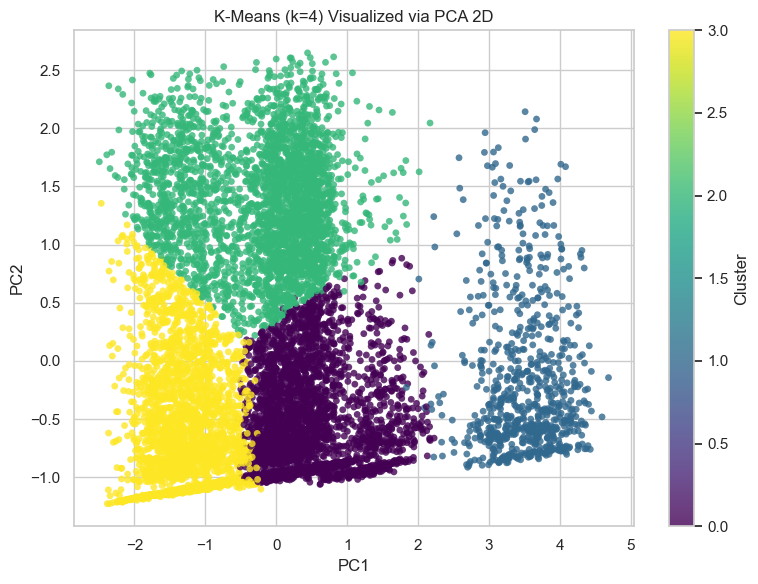

In [20]:
# Visualize clusters in PCA 2D (different variable names/style)
pca_vis = PCA(n_components=2, random_state=SEED)
proj2 = pca_vis.fit_transform(Xc_std)

plt.figure(figsize=(8,6))
plt.scatter(proj2[:,0], proj2[:,1], c=clean['Cluster'], cmap='viridis', s=24, alpha=0.8, edgecolors='none')
plt.title('K-Means (k=4) Visualized via PCA 2D')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

## C4 – Summaries and silhouette score

I report average credit limits and revolving balances per cluster plus the silhouette score. With those numbers I can defend the choice of four clusters.


In [21]:
# Cluster summaries and silhouette score (same metrics, updated vars)
summary = clean.groupby('Cluster')[['Credit_Limit','Total_Revolving_Bal']].mean().round(2)
print("Cluster Summary:\n", summary)

print("Silhouette Score:", silhouette_score(Xc_std, clean['Cluster']))

Cluster Summary:
          Credit_Limit  Total_Revolving_Bal
Cluster                                   
0            11181.32               885.86
1            14082.14              1367.62
2             2637.41              1679.36
3            10076.14               930.68
Silhouette Score: 0.44848415663519264
Silhouette Score: 0.44848415663519264
